# Support Vector Machine 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(1,1)
plt.clf()
import seaborn as sns
sns.set(context="paper" , style ="whitegrid",rc={"figure.facecolor":"white"})

<Figure size 432x288 with 0 Axes>

In [2]:
from scipy.optimize import minimize 
from scipy.stats import norm


# version Soft margin 
Aim : two-value classification      
$t \in \{-1,1\}  $    
data is $ X =\{x_1,x_2, ...,x_n \}$ and  $ t =\{t_1,t_2, ...,t_n \}$    
Objective function(optimize a, maximize this function) : 
\begin{equation}
L(a) = \sum_{n=1}^N a_n - \frac{1}{2}\sum_{n=1}^N \sum_{m=1}^N a_n a_m t_n t_m k(x_n,x_m) 
\end{equation}
the kernel in this case, we use $ k(x_n,x_m)  = exp(-\gamma ||x_n - x_m||) $ <br>
Constraints : $ 0 ≤ a_n ≤ C $, $\sum_{n=1}^N a_n t_n = 0$ 

we have to tune C and $\gamma$

## Generate data 
model1 : $ y = sin(x)+ 1 + \epsilon, \epsilon \sim N(0,\sigma^2) $  <br>
model2 : $ y = sin(x) + \epsilon, \epsilon \sim N(0,\sigma^2) $ <br> 

Text(0,0.5,'y')

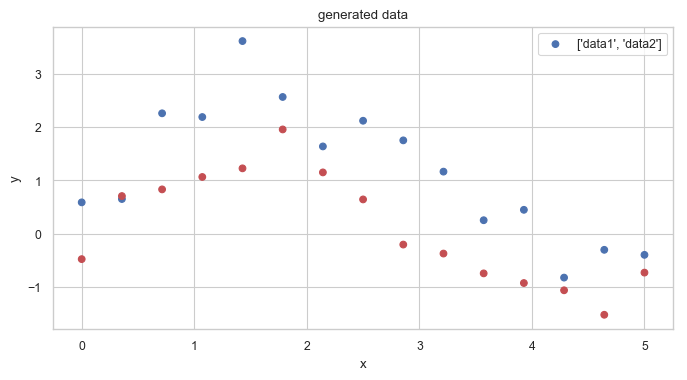

In [12]:
np.random.seed(1230)
nm = norm(scale = 0.5)


x1 = np.linspace(0,5,15)
y1 = np.sin(x1) +  1 +  nm.rvs(size = len(x1))
x2 = np.linspace(0,5,15)
y2 = np.sin(x2) + nm.rvs(size = len(x2))
x = np.hstack((x1,x2))
y = np.hstack((y1,y2))
t = np.array([1 for i in range(len(x1))] + [-1 for i in range(len(x2))])
c = ["b" for i in range(len(x1))] + ["r" for i in range(len(x2))]

plt.figure(figsize=(8,4),dpi=100)
plt.scatter(x,y,color=c,label=["data1","data2"])
plt.legend()
plt.title("generated data")
plt.xlabel("x")
plt.ylabel("y")

In [22]:
d = np.hstack((x,y)).reshape(-1,2,order="F")
#print(np.hstack((x,y)))
#print(np.hstack((x,y)).reshape(-1,2,order="C"))
#print(d)
#for dd in d:
#    plt.scatter(dd[0],dd[1],color = "b")
print(d)

[[ 0.          0.58792136]
 [ 0.35714286  0.65059507]
 [ 0.71428571  2.2589972 ]
 [ 1.07142857  2.18893163]
 [ 1.42857143  3.61438134]
 [ 1.78571429  2.56540189]
 [ 2.14285714  1.63760114]
 [ 2.5         2.11924754]
 [ 2.85714286  1.75131123]
 [ 3.21428571  1.16447881]
 [ 3.57142857  0.25268311]
 [ 3.92857143  0.44806573]
 [ 4.28571429 -0.82397943]
 [ 4.64285714 -0.30254881]
 [ 5.         -0.39698456]
 [ 0.         -0.47722782]
 [ 0.35714286  0.70627337]
 [ 0.71428571  0.83138323]
 [ 1.07142857  1.06416043]
 [ 1.42857143  1.2261952 ]
 [ 1.78571429  1.95625809]
 [ 2.14285714  1.15018027]
 [ 2.5         0.64314441]
 [ 2.85714286 -0.20412688]
 [ 3.21428571 -0.37272828]
 [ 3.57142857 -0.74467096]
 [ 3.92857143 -0.92585504]
 [ 4.28571429 -1.06192697]
 [ 4.64285714 -1.52131693]
 [ 5.         -0.73024455]]


## Support Vector Machine 

In [38]:
# hypter parameters
gamma = 0.45
C =20 



def kernel(x1,x2,gamma=gamma):
    return(np.exp(-gamma*np.sum((x1-x2)**2)))

global ind 
ind = 0
def likelihood(p,d,t):
    
    l = 0
    l += np.sum(p)
    N = len(d)
    for n in range(N):
        for m in range(N):
            l -= 1/2*p[n]*p[m]*t[n]*t[m]*kernel(d[n],d[m])
    global ind
    ind += 1 
    if ind % 50 == 0:
        print(ind,-l)
    return(-l)

def cons(p):
    v = np.sum(p*t)
    return( v)


# constrain option
arg = (d,t)
N = len(d)
x0 = [0.2 for i in range(N)]
bounds = ((0,C),)*N
constraints = ({ "type":"eq", "fun":cons})

result = minimize(fun=likelihood,
                 x0 =x0,
                 constraints=constraints,
                 bounds = bounds,
                 args=(d,t),
                 method="SLSQP")
print(result)


50 -18.598378873101453
100 -41.12157198743553
150 -85.03614759717502
200 -133.94950354399307
250 -142.05227246821704
300 -146.73898134944577
350 -147.52583451300558
400 -148.81438159878243
450 -149.13703005185866
500 -149.3011587755518
550 -149.54408789182932
600 -149.77120764156993
650 -150.08611825905132
700 -150.10970833525175
750 -150.12041093707603
800 -150.12093584620112
     fun: -150.12097544604904
     jac: array([ 0.1046257 , -0.86158752,  0.81269836,  0.1050415 ,  0.33618164,
        0.10482788, -0.90225983,  0.36440277,  0.72438049,  0.62184143,
        0.2002182 ,  1.36608887, -1.11762238,  0.90054703,  0.10409546,
       -0.10443497, -1.19593048, -0.10426712,  0.60689163,  0.75084686,
       -1.14199448, -0.10361481, -0.04944229,  0.57665634,  0.12698746,
        0.12387466, -0.10393524, -0.06514359,  1.05728531, -0.76575851])
 message: 'Optimization terminated successfully.'
    nfev: 833
     nit: 26
    njev: 26
  status: 0
 success: True
       x: array([6.20220436e+0

In [43]:
print("-------- estimated parameters ---------")
print(np.round(result.x,2))
result.x = np.round(result.x,2)

-------- estimated parameters ---------
[ 6.2  20.    0.    8.23  0.    2.53 20.    0.    0.    0.    0.    0.
 20.    0.   13.32  3.53 20.    4.37  0.    0.   20.    7.48  0.    0.
  0.    0.   14.9   0.    0.   20.  ]


## interpretation of results
if a > 0 , that is support vectors    
if 0 < a < C , that is support vectors on the margin    
if a =C , support vectors within margin     
b is calculated as     
$ b = \frac{1}{N_M}\sum_{n\in M } (t_n - \sum_{m \in S}a_m t_m k(x_n,x_m)) $ <br>
where, S is support vector , M is a vector which meets 0 < a < C. <br> 
Prediction is done by   
$ y(x) = \sum_{n=1}^N a_nt_n k(x,x_n) + b$ <br> 

In [44]:
a = result.x 
NM = len(a > 0)
M_ind = np.where(a >0)[0]
S_ind = np.where( (a < C - 0.001) & (a > 0) )[0]
b= 0 
for n in M_ind:
    b += t[n]
    for m in S_ind:
        b -= a[m]*t[m]*kernel(d[n],d[m])
b = b/NM
print(b)
print("support vectors :",M_ind)
print("support vectors within margin : ",S_ind)

-0.19871833756823828
support vectors : [ 0  1  3  5  6 12 14 15 16 17 20 21 26 29]
support vectors within margin :  [ 0  3  5 14 15 17 21 26]


In [46]:
def predY(x_,a,d,t,b):
    y_ = 0
    for i in range(len(d)):
        y_ += a[i]*t[i]*kernel(x_,d[i]) 
    y_ += b 
    return(y_)
predY([0,0],a,d,t,b)

-0.12326762353455518

In [47]:
x = np.linspace(0,5,20)
y = np.linspace(-1.5,4,20)
xx,yy = np.meshgrid(x,y)

zz = np.ndarray(shape=(len(xx),len(yy)))
for i in range(len(x)):
    for j in range(len(y)):
        zz[i,j] = predY([xx[i,j],yy[i,j]],a,d,t,b)

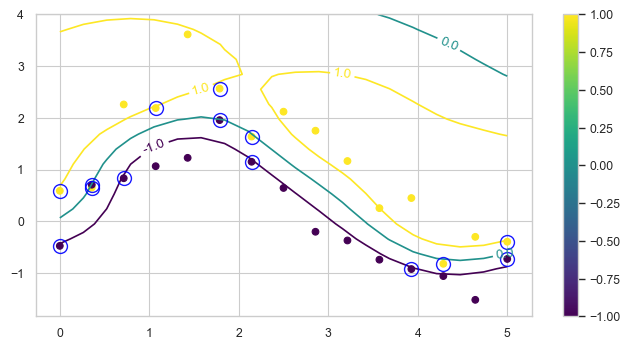

In [48]:
plt.figure(figsize=(8,4),dpi=100)
plt.plot(d.T[0][M_ind],d.T[1][M_ind],alpha = 0.9,marker="o",color = "none",
            markeredgewidth=1,markersize=10,markeredgecolor="blue")

cont = plt.contour(xx,yy,zz,levels=[-1,0,1],alpha = 1,cmap="viridis")
cont.clabel(fmt="%1.1f")
plt.scatter(d.T[0],d.T[1],c = t, cmap="viridis")
plt.colorbar()
